## Stock Price BTC-USD with Stacked-Bidirectional LSTM-RNN
- Percobaan 1 = Vanilla LSTM-RNN
- Percobaan 2 = Stacked LSTM-RNN
- Percobaan 3 = Bidirectional LSTM-RNN
- Percobaan 4 = Stacked-Bidirectional LSTM-RNN

### 1. Deklarasi Pustaka

In [1]:
# pustaka untuk manipulasi data-frame
import pandas as pd
from pandas import concat
from pandas import read_csv
from pandas import read_excel
from pandas_datareader import DataReader

# pustaka untuk madnipulasi data-array
import numpy as np
from numpy import concatenate
from numpy import array

# pustaka untuk waktu komputasi
import time
from datetime import datetime

# pustaka untuk visualisasi data
import seaborn as sns
from matplotlib import pyplot
from matplotlib import pyplot as plt

# pustaka untuk visualisasi acf dan pacf
import scipy.stats as sc
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
        
# pustaka untuk membuat data latih dan data uji.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# pustaka untuk membuat model prediksi LSTM-RNN
import itertools
from keras.utils import Sequence
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import BatchNormalization
from keras.optimizers import Adam, Adamax, RMSprop, SGD

# early stoping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# pustaka untuk  evaluasi model prediksi
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### 2. Akuisisi Data

In [2]:
# Set waktu komputasi
start = time.time()

In [3]:
# fix random seed for reproducibility
np.random.seed(1234);

In [4]:
# membaca dataset via csv file
dataset = read_csv("dataset/BTC-USD.csv", parse_dates=['Date']);

In [5]:
# set index tanggal
dataset = dataset.set_index("Date");

In [6]:
# menampilkan metadata dataset
dataset.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2896 entries, 2014-12-09 to 2022-11-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2896 non-null   float64
 1   High       2896 non-null   float64
 2   Low        2896 non-null   float64
 3   Close      2896 non-null   float64
 4   Adj Close  2896 non-null   float64
 5   Volume     2896 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 158.4 KB


In [7]:
dataset

Open          High           Low         Close  \
Date                                                                 
2014-12-09    361.894989    363.066986    344.950989    352.218994   
2014-12-10    352.204987    352.384003    346.364990    346.364990   
2014-12-11    344.339996    361.356995    338.763000    350.506012   
2014-12-12    350.833008    352.983002    349.290985    352.541992   
2014-12-13    352.381012    352.381012    346.588013    347.376007   
...                  ...           ...           ...           ...   
2022-11-08  20600.671875  20664.607422  17603.544922  18541.271484   
2022-11-09  18543.761719  18590.458984  15682.692383  15880.780273   
2022-11-10  15883.158203  18054.312500  15834.018555  17586.771484   
2022-11-11  17583.251953  17650.943359  16543.482422  17034.292969   
2022-11-12  17066.675781  17066.675781  16659.347656  16752.431641   

               Adj Close        Volume  
Date                                    
2014-12-09    352.218994      32915500  
2014-12-10    346.364990      16427700  
2014-12-11    350.506012      32431300  
2014-12-12    352.541992      16989800  
2014-12-13    347.376007      11675900  
...                  ...           ...  
2022-11-08  18541.271484  118992465607  
2022-11-09  15880.780273  102905151606  
2022-11-10  17586.771484   83202283721  
2022-11-11  17034.292969   55871616488  
2022-11-12  16752.431641   50010157056  

[2896 rows x 6 columns]

### 3. Eksplorasi Data Analisis

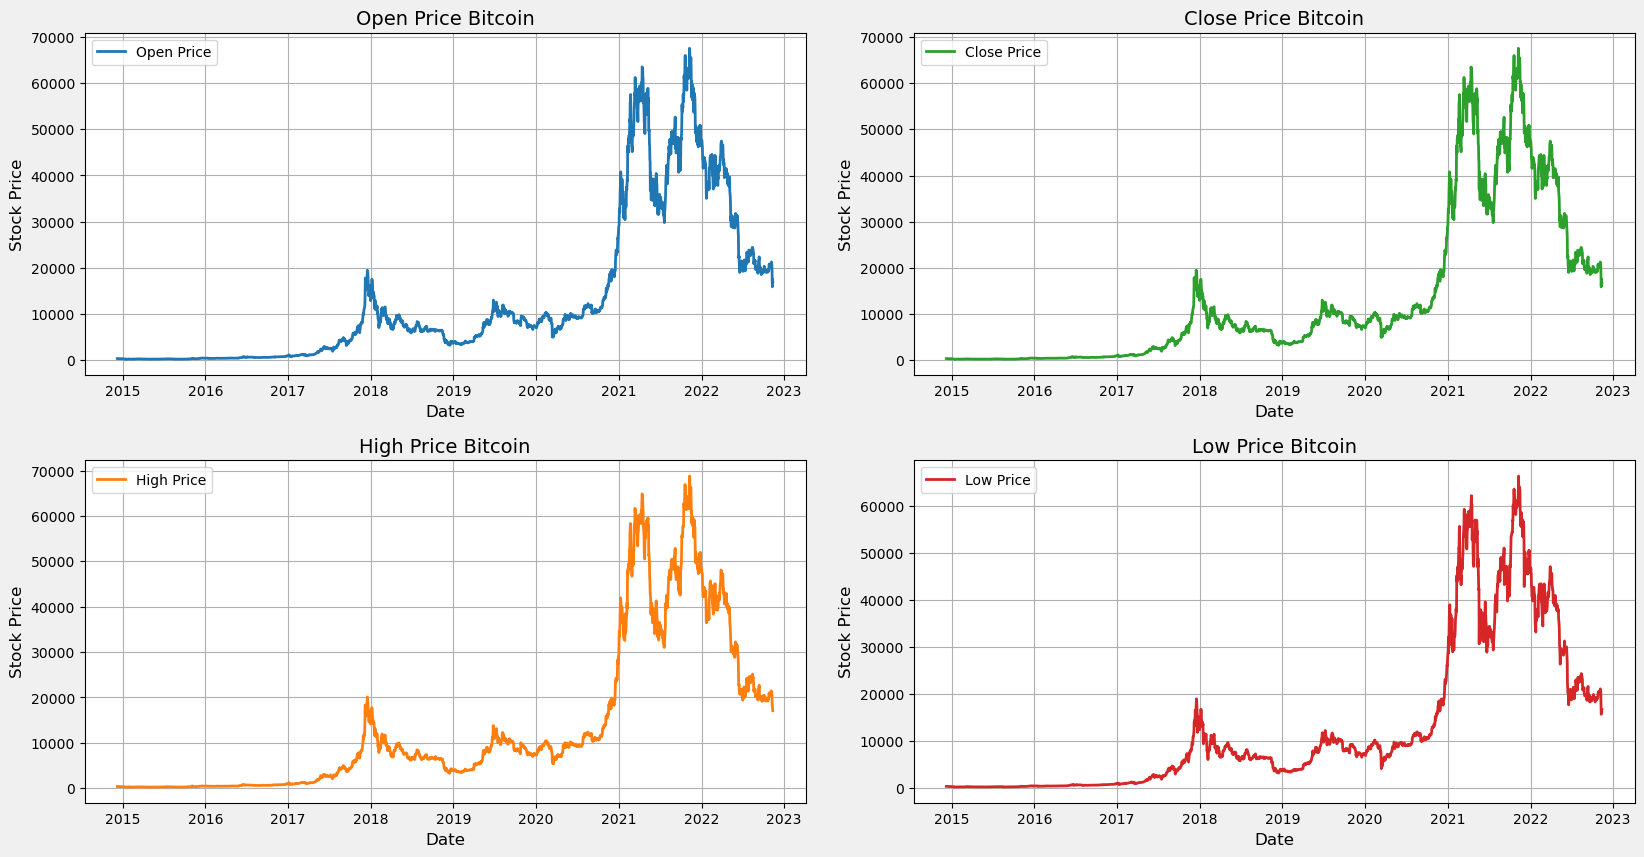

In [8]:
# membuat frame
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, facecolor="#f0f0f0", figsize=(20, 10))

# membuat time series plot
ax1.plot(dataset.index.values, dataset["Open"], color="tab:blue", label="Open Price", linewidth=2)

# membuat label-label
ax1.set_title("Open Price Bitcoin", fontsize=14)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price", fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True)
# ----------------------------------------------------------------------------------------------------

# membuat time series plot
ax2.plot(dataset.index.values, dataset["Close"], color="tab:green", label="Close Price", linewidth=2)

# membuat label-label
ax2.set_title("Close Price Bitcoin", fontsize=14)
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price", fontsize=12)
ax2.legend(loc='upper left')
ax2.grid(True)
# ----------------------------------------------------------------------------------------------------

# membuat time series plot
ax3.plot(dataset.index.values, dataset["High"], color="tab:orange", label="High Price", linewidth=2)

# membuat label-label
ax3.set_title("High Price Bitcoin", fontsize=14)
ax3.set_xlabel("Date", fontsize=12)
ax3.set_ylabel("Stock Price", fontsize=12)
ax3.legend(loc='upper left')
ax3.grid(True)
# ----------------------------------------------------------------------------------------------------

# membuat time series plot
ax4.plot(dataset.index.values, dataset["Low"], color="tab:red", label="Low Price", linewidth=2)

# membuat label-label
ax4.set_title("Low Price Bitcoin", fontsize=14)
ax4.set_xlabel("Date", fontsize=12)
ax4.set_ylabel("Stock Price", fontsize=12)
ax4.legend(loc='upper left')
ax4.grid(True)
# ----------------------------------------------------------------------------------------------------

# set the spacing between subplots
plt.subplots_adjust(wspace=0.15, hspace=0.25)

# menampilkan plot
plt.show()

### 4. Praproses Dataset

- Seleksi Fitur

In [9]:
# memilih fitur close price
dataset = dataset.filter(['Close']);

In [10]:
# convert dataframe to series close price
data = dataset.values

In [11]:
np.round(data[:5],7)

array([[352.218994],
       [346.36499 ],
       [350.506012],
       [352.541992],
       [347.376007]])

In [12]:
data.shape

(2896, 1)

- Normalisasi Data

In [13]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [14]:
np.round(scaled_data[:5],7)

array([[0.0025838],
       [0.0024969],
       [0.0025583],
       [0.0025885],
       [0.0025119]])

In [15]:
scaled_data.shape

(2896, 1)

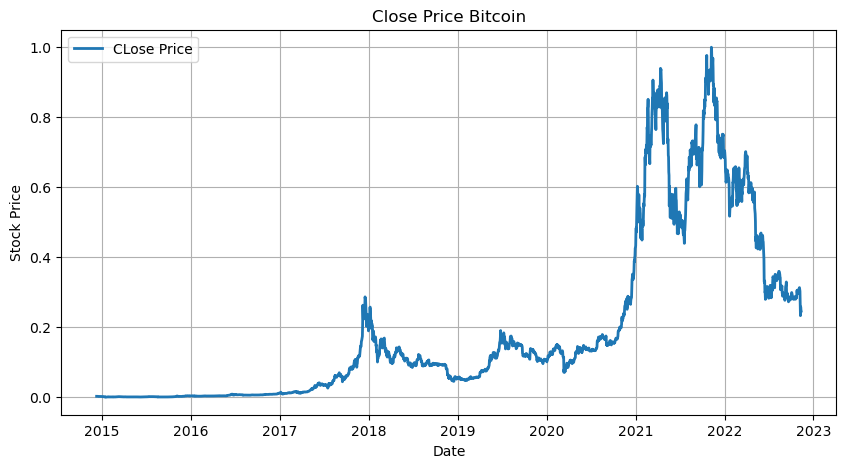

In [16]:
# membuat frame
fig, ax = plt.subplots(figsize = (10,5))

# membuat time series plot
ax.plot(dataset.index.values, scaled_data, color="tab:blue", label="CLose Price", linewidth=2)

# membuat label-label
ax.set_title("Close Price Bitcoin", fontsize=12)
ax.set_xlabel("Date", fontsize=10)
ax.set_ylabel("Stock Price", fontsize=10)
ax.legend(loc='upper left')
ax.grid(True)

# menampilkan plot
plt.show()

- split dataset

In [17]:
# split data train and test
train_data, test_data = train_test_split(scaled_data, train_size=0.80, test_size=0.20, shuffle=False)

In [18]:
# data train
np.round(train_data[:5],7)

array([[0.0025838],
       [0.0024969],
       [0.0025583],
       [0.0025885],
       [0.0025119]])

In [19]:
train_data.shape

(2316, 1)

In [20]:
# data test
np.round(test_data[:5],7)

array([[0.8861327],
       [0.9397025],
       [0.9338594],
       [0.9368913],
       [0.9110528]])

In [21]:
test_data.shape

(580, 1)

- Supervised Learning

In [22]:
# convert an array of values into a dataset matrix

# function for supervised learning
def create_dataset(look_back, dataset):
    
    # declare variable X and Y
    dataX = []
    dataY = []
    
    # for loop for create supervised learning
    for i in range(look_back, len(dataset)):
        
        # insert value X and Y 
        dataX.append(dataset[i-look_back:i, 0])
        dataY.append(dataset[i, 0])
        
    # return value X and Y
    return np.array(dataX), np.array(dataY)

In [23]:
# process supervised learning
look_back = 60
x_train, y_train = create_dataset(look_back, train_data)
x_test, y_test = create_dataset(look_back, test_data)

In [24]:
print(x_train.shape, y_train.shape)

(2256, 60) (2256,)


In [25]:
print(x_test.shape, y_test.shape)

(520, 60) (520,)


In [26]:
# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
print(x_train.shape, x_test.shape)

(2256, 60, 1) (520, 60, 1)


### 5 Vanilla LSTM-RNN

In [28]:
# The LSTM architecture
model_1 = Sequential()

# LSTM layer with Dropout regularisation
model_1.add(LSTM(units=50, input_shape=(x_train.shape[1], 1)))

# The output layer
model_1.add(Dense(1))

# Compile the model LSTM
model_1.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
# fit network
history_1 = model_1.fit(x_train, y_train, epochs=50, batch_size=8, verbose=1, use_multiprocessing=True, shuffle=False)

Epoch 1/50
282/282 [==============================] - 4s 10ms/step - loss: 5.0658e-04
Epoch 2/50
282/282 [==============================] - 2s 9ms/step - loss: 0.0018
Epoch 3/50
282/282 [==============================] - 2s 9ms/step - loss: 9.5198e-04
Epoch 4/50
282/282 [==============================] - 2s 9ms/step - loss: 4.4909e-04
Epoch 5/50
282/282 [==============================] - 2s 9ms/step - loss: 2.8465e-04
Epoch 6/50
282/282 [==============================] - 2s 9ms/step - loss: 2.0371e-04
Epoch 7/50
282/282 [==============================] - 3s 9ms/step - loss: 1.5592e-04
Epoch 8/50
282/282 [==============================] - 3s 9ms/step - loss: 1.3617e-04
Epoch 9/50
282/282 [==============================] - 2s 9ms/step - loss: 1.2715e-04
Epoch 10/50
282/282 [==============================] - 2s 9ms/step - loss: 1.2249e-04
Epoch 11/50
282/282 [==============================] - 2s 9ms/step - loss: 1.1916e-04
Epoch 12/50
282/282 [==============================] - 2s 9ms/step

In [30]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [31]:
testPredictions_1 = model_1.predict(x_test)
print(testPredictions_1[:7])

17/17 [==============================] - 1s 5ms/step
[[0.58399683]
 [0.5904448 ]
 [0.5644655 ]
 [0.6138374 ]
 [0.6330783 ]
 [0.63466275]
 [0.60335916]]


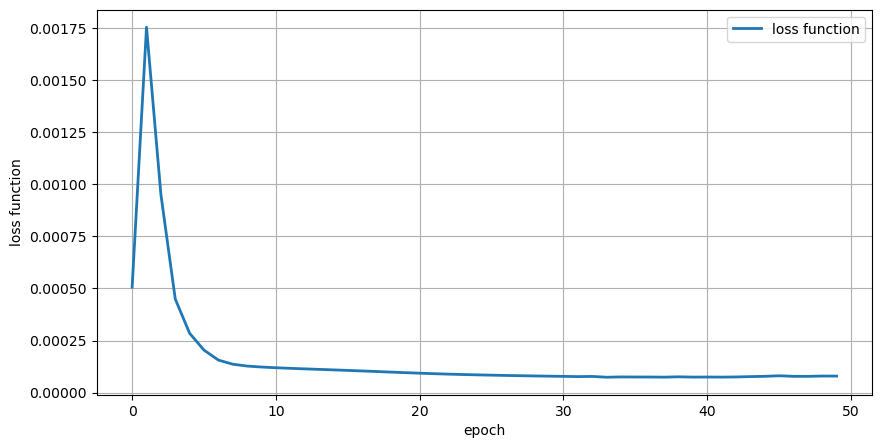

In [32]:
# membuat frame
fig, ax = plt.subplots(figsize = (10,5))

# membuat time series plot
ax.plot(history_1.history['loss'], color="tab:blue", label="loss function", linewidth=2)

# membuat label-label
ax.set_xlabel("epoch", fontsize=10)
ax.set_ylabel("loss function", fontsize=10)
ax.legend(loc='upper right')
ax.grid(True)

# menampilkan plot
plt.show()

#### 5.1 Evaluasi Model The Vanilla LSTM-RNN

In [33]:
scores_1 = model_1.evaluate(x_train, y_train)
scores_1

71/71 [==============================] - 1s 6ms/step - loss: 9.6627e-04


0.0009662743541412055

In [34]:
scores_1 = model_1.evaluate(x_test, y_test)
scores_1

17/17 [==============================] - 0s 6ms/step - loss: 0.0013


0.001320811570622027

- MAE (Mean Absolute Error)

In [35]:
mae = mean_absolute_error(y_test, testPredictions_1)
print('Test MAE : %.4f' % mae)

Test MAE : 0.0320


- MSE (Mean Squared Error)

In [36]:
mse = mean_squared_error(y_test, testPredictions_1)
print('Test MSE: %.4f' % mse)

Test MSE: 0.0013


- RMSE (Root Mean Squared Error)

In [37]:
rmse = sqrt(mse)
print('Test RMSE: %.4f' % rmse)

Test RMSE: 0.0363


- Corelation pearson

In [38]:
hasil_1 = np.stack((y_test.reshape(-1), testPredictions_1.reshape(-1)), axis=1)
hasil_1 = pd.DataFrame(hasil_1, columns = ['data_aktual','prediksi'])

In [39]:
hasil_1

data_aktual  prediksi
0       0.551373  0.583997
1       0.524931  0.590445
2       0.577541  0.564466
3       0.594170  0.613837
4       0.596957  0.633078
..           ...       ...
515     0.272496  0.339191
516     0.233016  0.310376
517     0.258332  0.270942
518     0.250134  0.289111
519     0.245951  0.284015

[520 rows x 2 columns]

In [40]:
r, p = sc.pearsonr(hasil_1["data_aktual"], hasil_1["prediksi"])
print("korelasi data akual dengan hasil prediksi" +" {:.4f} ".format(r)+ "dengan signifikansi" +" {:.4f} ".format(p))

korelasi data akual dengan hasil prediksi 0.9937 dengan signifikansi 0.0000 


#### 5.2 Visualisasi Data The Vanilla LSTM-RNN

In [41]:
# inverse value test predictions
testPredictions_1 = scaler.inverse_transform(testPredictions_1)

In [42]:
# shift test predictions for plotting
testPredictionsPlot_1 = np.empty_like(scaled_data)
testPredictionsPlot_1[:, :] = np.nan
testPredictionsPlot_1[(len(dataset) - testPredictions_1.shape[0]):len(dataset), :] = testPredictions_1

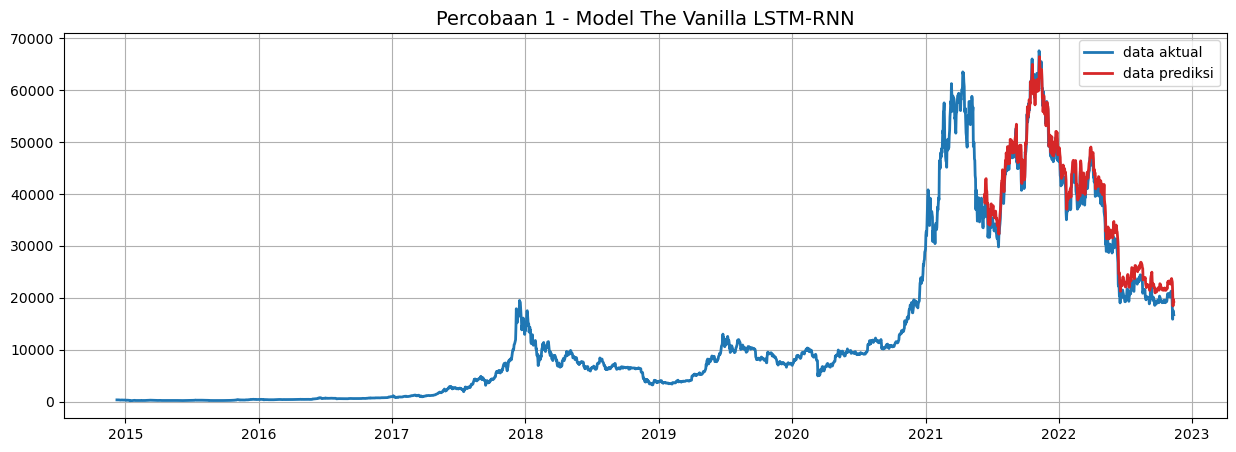

In [43]:
# membuat frame
fig, ax = plt.subplots(figsize = (15,5))

# membuat time series plot
ax.plot(dataset.index.values, scaler.inverse_transform(scaled_data), color="tab:blue", label="data aktual", linewidth=2)
ax.plot(dataset.index.values, testPredictionsPlot_1, color="tab:red", label="data prediksi", linewidth=2)

# membuat label-label
ax.set_title("Percobaan 1 - Model The Vanilla LSTM-RNN", fontsize=14)
ax.legend(loc="best")
ax.grid(True)

# menampilka
plt.show()

### 6 Stacked LSTM-RNN 

In [44]:
# The LSTM architecture
model_2 = tf.keras.Sequential([
    
    # First LSTM layer with Dropout regularisation
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    
    # Secound LSTM layer with Dropout regularisation
    tf.keras.layers.LSTM(units=50, return_sequences=True),
    
    # Third LSTM layer with Dropout regularisation
    tf.keras.layers.LSTM(units=50, return_sequences=False),
    
    # The output layer
    tf.keras.layers.Dense(1)
])

In [ ]:
# Compile the model LSTM
model_2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# fit network
history_2 = model_2.fit(x_train, y_train, epochs=50, batch_size=8, verbose=1, use_multiprocessing=True, shuffle=False)

In [ ]:
model_2.summary()

#### 6.1 Evaluasi Model Stacked LSTM-RNN

#### 6.2 Visualisasi Data Stacked LSTM-RNN

### 7 Bidirectional LSTM-RNN 

#### 7.1 Evaluasi Model Bidirectional LSTM-RNN

#### 7.2 Visualisasi Data Bidirectional LSTM-RNN

### 8 Stacked-Bidirectional LSTM-RNN

In [45]:
# The LSTM architecture
model_4 = Sequential()

# First LSTM layer with Dropout regularisation
model_4.add(
    Bidirectional(
        LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1))
    )
)

# Second LSTM layer with Dropout regularisation
model_4.add(
    Bidirectional(
        LSTM(units=50, return_sequences=False)
    )
)


# The output layer
model_4.add(Dense(1))

# Compile the model LSTM
model_4.compile(optimizer='adam', loss='mean_squared_error')

In [64]:
# fit network
history_4 = model_4.fit(x_train, y_train, epochs=50, batch_size=8, verbose=1, use_multiprocessing=True, shuffle=False)

Epoch 1/100
71/71 [==============================] - 3s 40ms/step - loss: 7.0450e-04
Epoch 2/100
71/71 [==============================] - 3s 43ms/step - loss: 5.9893e-04
Epoch 3/100
71/71 [==============================] - 3s 42ms/step - loss: 6.8997e-04
Epoch 4/100
71/71 [==============================] - 3s 41ms/step - loss: 5.9424e-04
Epoch 5/100
71/71 [==============================] - 3s 42ms/step - loss: 6.8783e-04
Epoch 6/100
71/71 [==============================] - 3s 42ms/step - loss: 5.8232e-04
Epoch 7/100
71/71 [==============================] - 3s 43ms/step - loss: 6.4982e-04
Epoch 8/100
71/71 [==============================] - 3s 42ms/step - loss: 5.5560e-04
Epoch 9/100
71/71 [==============================] - 3s 40ms/step - loss: 6.0159e-04
Epoch 10/100
71/71 [==============================] - 3s 41ms/step - loss: 5.2498e-04
Epoch 11/100
71/71 [==============================] - 3s 42ms/step - loss: 5.7912e-04
Epoch 12/100
71/71 [==============================] - 3s 42ms/s

In [65]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60, 100)          20800     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 81,301
Trainable params: 81,301
Non-trainable params: 0
_________________________________________________________________


In [66]:
testPredictions_4 = model_4.predict(x_test)
print(testPredictions_4[:7])

17/17 [==============================] - 0s 12ms/step
[[0.5934677 ]
 [0.6084113 ]
 [0.57793856]
 [0.6369958 ]
 [0.6506504 ]
 [0.654368  ]
 [0.61831486]]


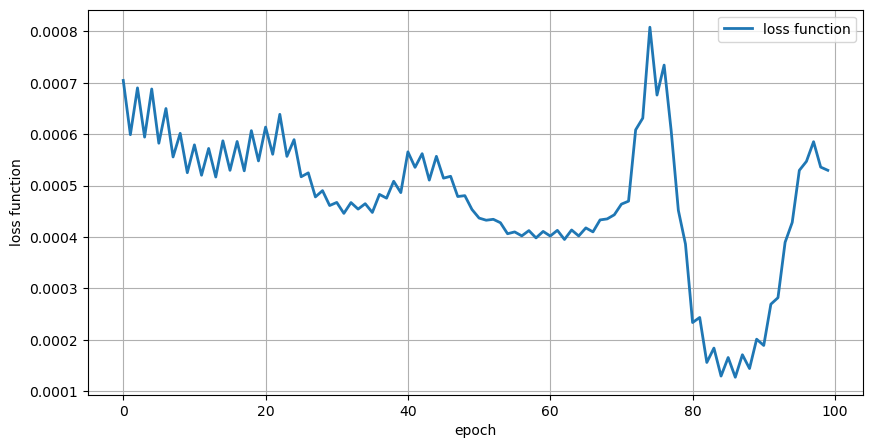

In [67]:
# membuat frame
fig, ax = plt.subplots(figsize = (10,5))

# membuat time series plot
ax.plot(history_4.history['loss'], color="tab:blue", label="loss function", linewidth=2)

# membuat label-label
ax.set_xlabel("epoch", fontsize=10)
ax.set_ylabel("loss function", fontsize=10)
ax.legend(loc='upper right')
ax.grid(True)

# menampilkan plot
plt.show()

#### 8.1 Evaluasi Model Stacked-Bidirectional LSTM-RNN

In [68]:
scores_4 = model_4.evaluate(x_train, y_train)
scores_4

71/71 [==============================] - 1s 12ms/step - loss: 5.8030e-04


0.0005802995292469859

In [69]:
scores_4 = model_4.evaluate(x_test, y_test)
scores_4

17/17 [==============================] - 0s 12ms/step - loss: 0.0020


0.001972676021978259

- MAE (Mean Absolute Error)

In [70]:
mae_4 = mean_absolute_error(y_test, testPredictions_4)
print('Test MAE : %.4f' % mae_4)

Test MAE : 0.0354


- MSE (Mean Squared Error)

In [71]:
mse_4 = mean_squared_error(y_test, testPredictions_4)
print('Test MSE: %.4f' % mse_4)

Test MSE: 0.0020


- RMSE (Root Mean Squared Error)

In [72]:
rmse_4 = sqrt(mse_4)
print('Test RMSE: %.4f' % rmse_4)

Test RMSE: 0.0444


- Corelation pearson

In [73]:
hasil_4 = np.stack((y_test.reshape(-1), testPredictions_4.reshape(-1)), axis=1)
hasil_4 = pd.DataFrame(hasil_4, columns = ['data_aktual','prediksi'])

In [74]:
hasil_4

data_aktual  prediksi
0       0.551373  0.593468
1       0.524931  0.608411
2       0.577541  0.577939
3       0.594170  0.636996
4       0.596957  0.650650
..           ...       ...
515     0.272496  0.300065
516     0.233016  0.267147
517     0.258332  0.226268
518     0.250134  0.254386
519     0.245951  0.242378

[520 rows x 2 columns]

In [75]:
r4, p4 = sc.pearsonr(hasil_4["data_aktual"], hasil_4["prediksi"])
print("korelasi data akual dengan hasil prediksi" +" {:.4f} ".format(r4)+ "dengan signifikansi" +" {:.4f} ".format(p4))

korelasi data akual dengan hasil prediksi 0.9919 dengan signifikansi 0.0000 


#### 8.2 Visualisasi Data Stacked-Bidirectional LSTM-RNN

In [76]:
# inverse value test predictions
testPredictions_4 = scaler.inverse_transform(testPredictions_4)

In [77]:
# shift test predictions for plotting
testPredictionsPlot_4 = np.empty_like(scaled_data)
testPredictionsPlot_4[:, :] = np.nan
testPredictionsPlot_4[(len(dataset) - testPredictions_4.shape[0]):len(dataset), :] = testPredictions_4

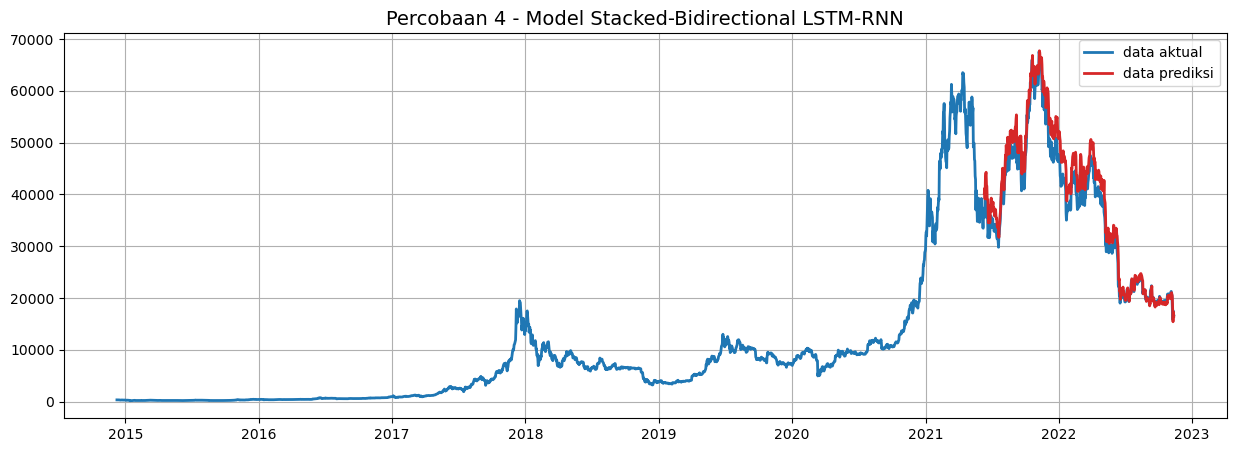

In [78]:
# membuat frame
fig, ax = plt.subplots(figsize = (15,5))

# membuat time series plot
ax.plot(dataset.index.values, scaler.inverse_transform(scaled_data), color="tab:blue", label="data aktual", linewidth=2)
ax.plot(dataset.index.values, testPredictionsPlot_4, color="tab:red", label="data prediksi", linewidth=2)

# membuat label-label
ax.set_title("Percobaan 4 - Model Stacked-Bidirectional LSTM-RNN", fontsize=14)
ax.legend(loc="best")
ax.grid(True)

# menampilkan plot
plt.show()

### 9. Complexity time

In [79]:
# Set akhir waktu komputasi 
end = time.time()

In [80]:
# Proses menghitung waktu komputasi
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)

In [81]:
# Hasil waktu komputasi
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:14:53.14
